In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

In [4]:
df=pd.read_csv("studentsperformancs.csv")

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.describe(include='object')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [13]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
print("categories in 'gender' variable : ",end="")
print(df['gender'].unique())

print("categories in 'race/ethnicity' variable : ",end="")
print(df['race/ethnicity'].unique())

print("categories in 'parental level of education' variable : ",end="")
print(df['parental level of education'].unique())

print("categories in 'lunch' variable : ",end="")
print(df['lunch'].unique())

print("categories in 'test preparation course' variable : ",end="")
print(df['test preparation course'].unique())

categories in 'gender' variable : ['female' 'male']
categories in 'race/ethnicity' variable : ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable : ['standard' 'free/reduced']
categories in 'test preparation course' variable : ['none' 'completed']


In [15]:
numeric_features = [feature for  feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for  feature in df.columns if df[feature].dtype == 'O']


print("we have {} numerical features :{}".format(len(numeric_features), numeric_features))
print("\nwe have {} categorical features :{}".format(len(categorical_features), categorical_features))

we have 3 numerical features :['math score', 'reading score', 'writing score']

we have 5 categorical features :['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [16]:
# Ensure the columns are numeric before summing
df['total score'] = df.iloc[:, 4:7].apply(pd.to_numeric, errors='coerce').sum(axis=1)

In [17]:
df['total score']=df['math score']+df['reading score']+df['writing score']
df['average score']=df['total score']/3


In [18]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [19]:
reading_full =df[df['reading score'] == 100]['average score'].count()
writing_full =df[df['writing score'] == 100]['average score'].count()
math_full =df[df['math score'] == 100]['average score'].count()

print(f"number of students who scored 100 in reading: {reading_full}")
print(f"number of students who scored 100 in writing: {writing_full}")
print(f"number of students who get 100 in math: {math_full}")

number of students who scored 100 in reading: 17
number of students who scored 100 in writing: 14
number of students who get 100 in math: 7


In [20]:
reading_less =df[df['reading score'] < 20]['average score'].count()
writing_less =df[df['writing score'] < 20]['average score'].count()
math_less =df[df['math score'] < 20]['average score'].count()

print(f"number of students who scored less than 20 in reading: {reading_less} ")
print(f"number of students who score less than 20in writing: {writing_less}")
print(f"number of students who get less than 20 in math: {math_less}")

number of students who scored less than 20 in reading: 1 
number of students who score less than 20in writing: 3
number of students who get less than 20 in math: 4


# Data Visualization


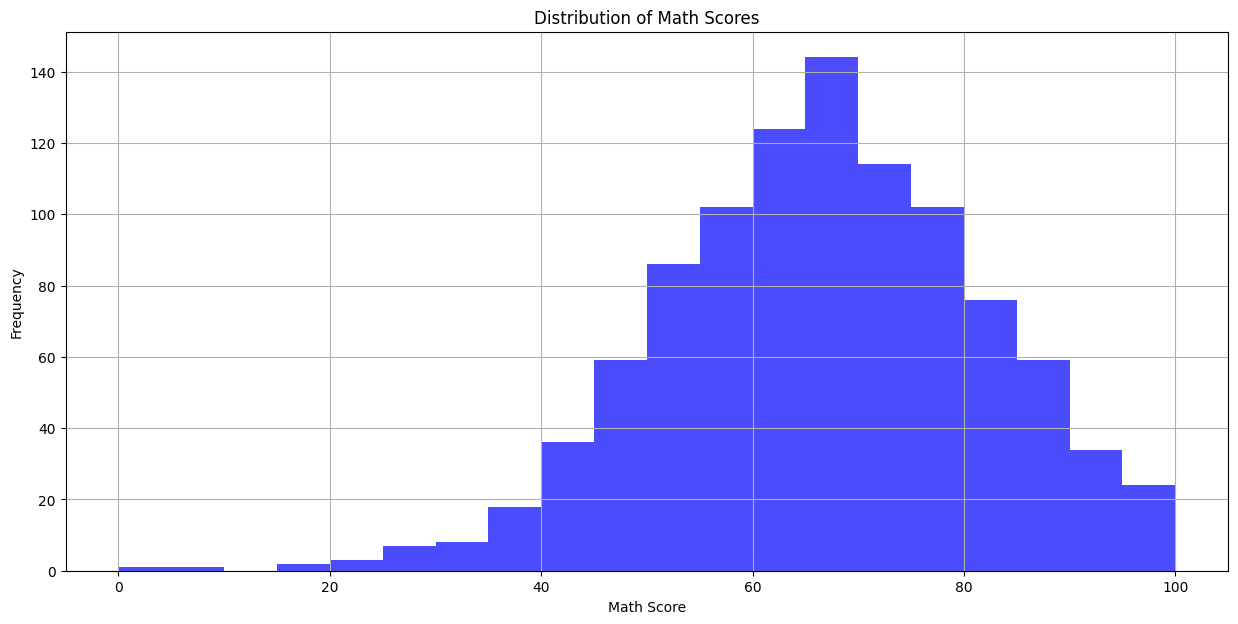

In [21]:
# Plot the histogram for 'math score'
fig=plt.figure(figsize=(15, 7))
df['math score'].hist(bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='math score', ylabel='Count'>

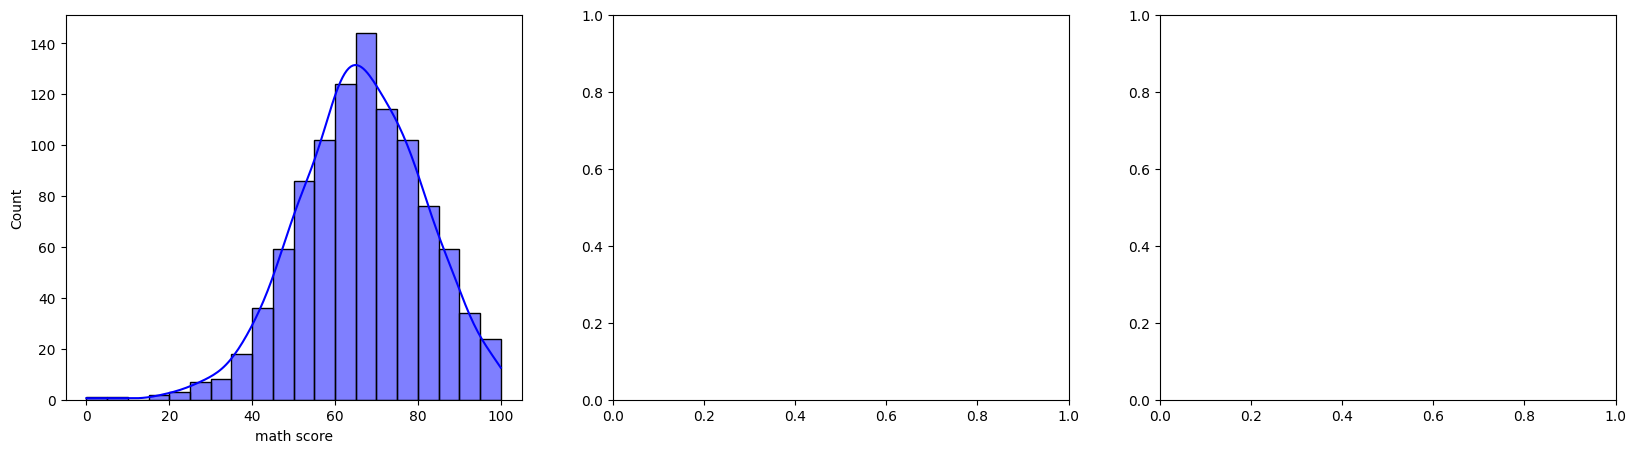

In [22]:
fig,axis=plt.subplots(1,3,figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['math score'], kde=True, color='blue', bins=20)


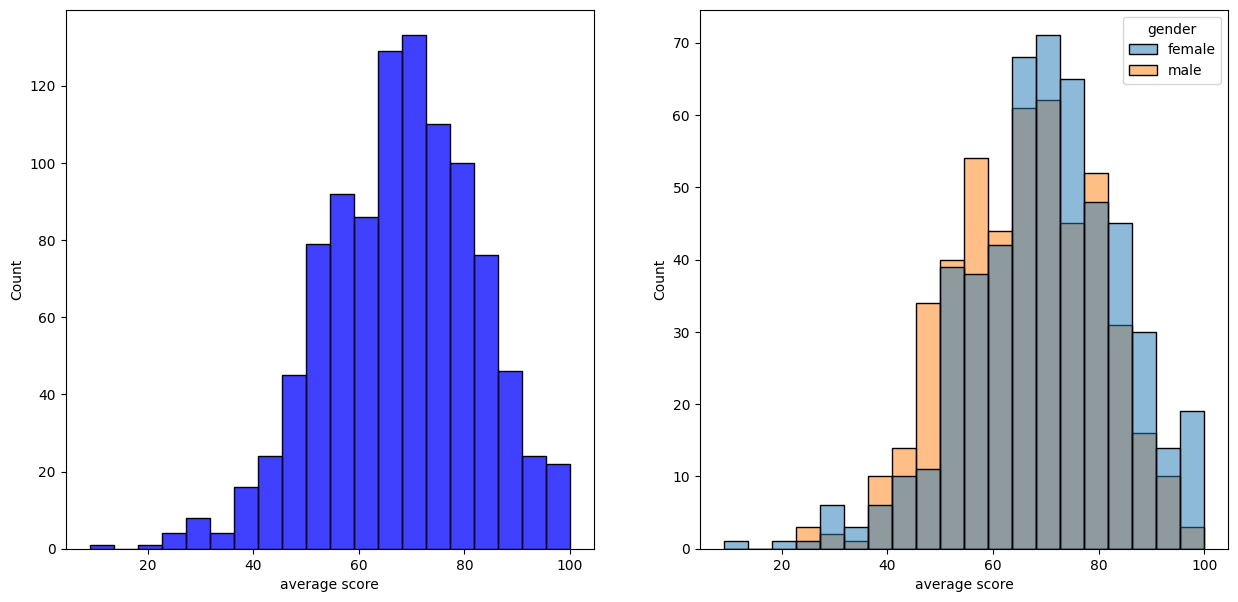

In [23]:
fig,axis= plt.subplots(1,2, figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='average score',kde=False,bins=20,color='blue')
plt.subplot(1,2,2)
sns.histplot(data=df,x='average score',kde=False,bins=20,color='blue',hue='gender')
plt.show()

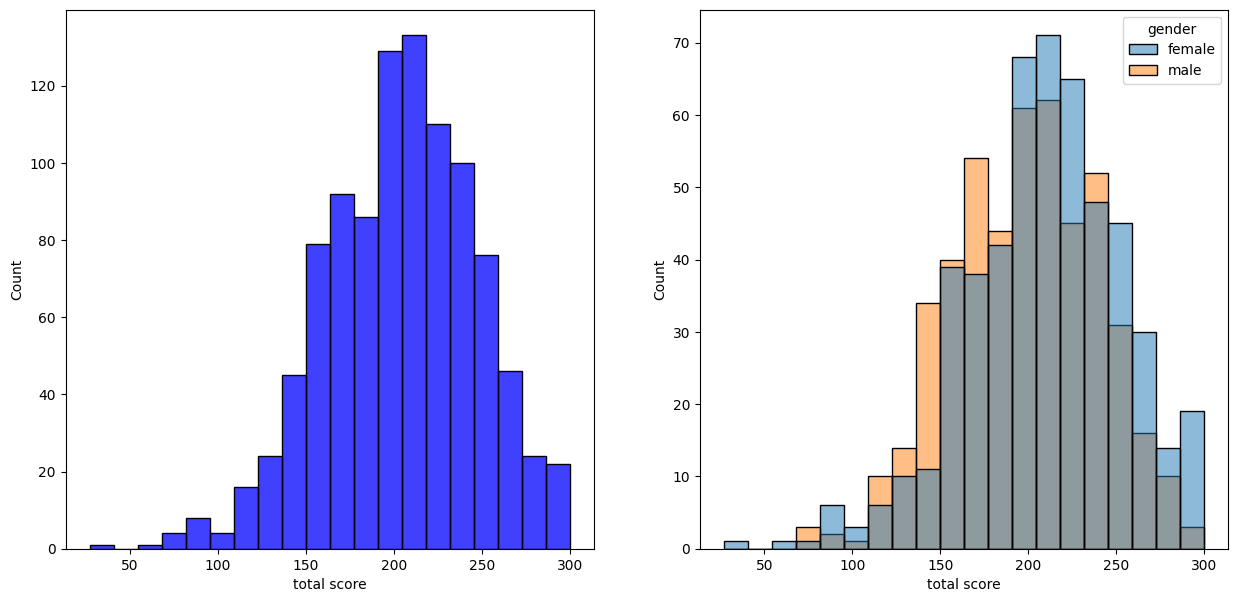

In [24]:
fig,axis= plt.subplots(1,2, figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='total score',kde=False,bins=20,color='blue')
plt.subplot(1,2,2)
sns.histplot(data=df,x='total score',kde=False,bins=20,color='blue',hue='gender')
plt.show()

c:\ml_project\venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\ml_project\venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\ml_project\venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\ml_project\venv\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\ml_project\venv\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\ml_project\venv\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x

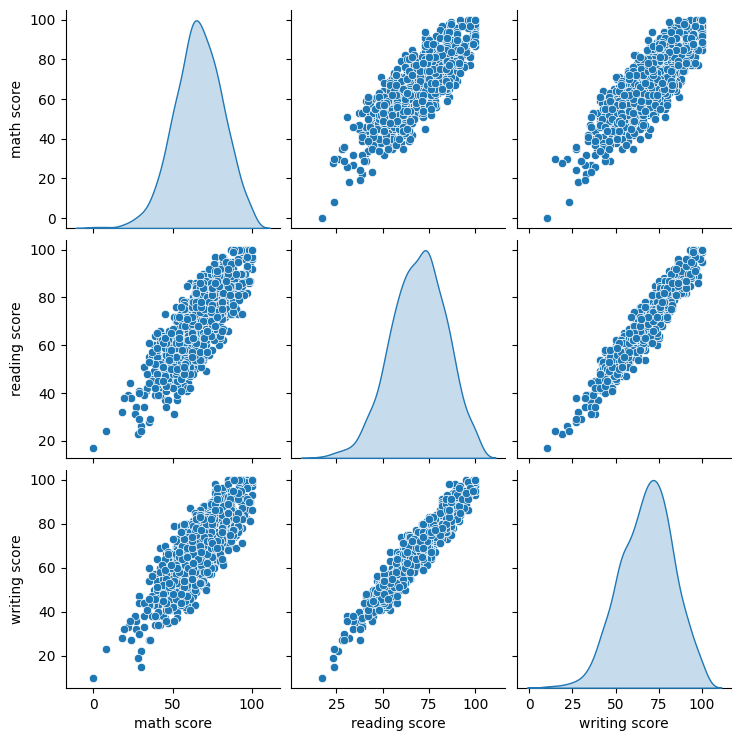

In [25]:
# Assuming predictions is a subset of the dataframe 'df' with relevant numerical columns
predictions = df[numeric_features]

sns.pairplot(predictions, diag_kind='kde', markers='o', palette='blue')
plt.show()